In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the dataset
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
X = data.drop("MEDV",axis=1)
y = data['MEDV']

In [6]:
print(X.shape, y.shape)

(506, 13) (506,)


In [7]:
data.rename(columns={'MEDV':'PRICE'},inplace=True)
y = data['PRICE']

In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [11]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [12]:
corr = data.corr()
corr.shape

(14, 14)

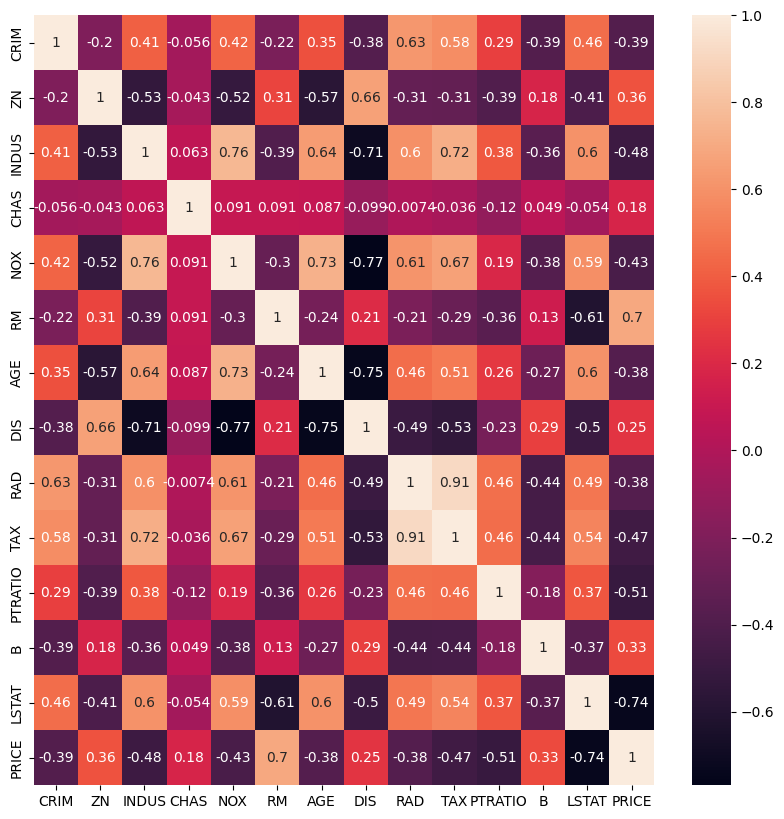

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear regression

In [16]:
#linear regeression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lr.intercept_)

22.796534653465343


In [18]:
coeff = pd.DataFrame({
    "Attribute": X.columns,
    "Coefficient": lr.coef_
})

coeff

,Attribute,Coefficient
0,CRIM,-1.002135
1,ZN,0.696269
2,INDUS,0.278065
3,CHAS,0.718738
4,NOX,-2.022319
5,RM,3.145240
6,AGE,-0.176048
7,DIS,-3.081908
8,RAD,2.251407
9,TAX,-1.767014


In [19]:
#prediction with test data
y_pred = lr.predict(X_test)

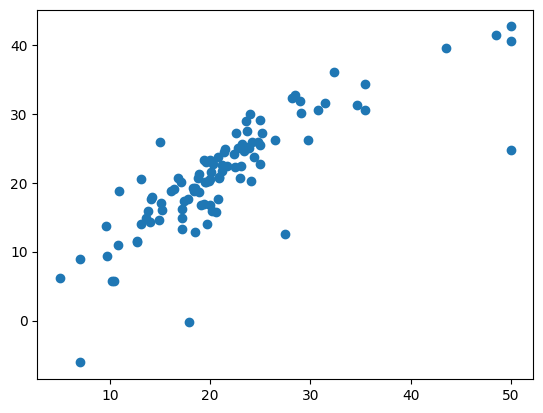

In [20]:
plt.scatter(y_test,y_pred)
plt.show()

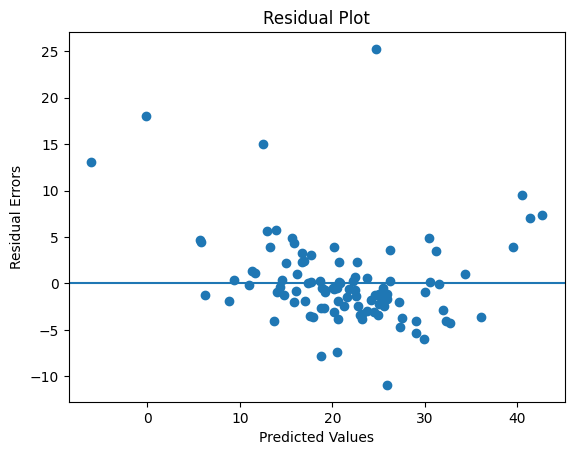

In [21]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)

plt.xlabel("Predicted Values")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()

c:\Users\rajan\Desktop\Boston-House-Pricing\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


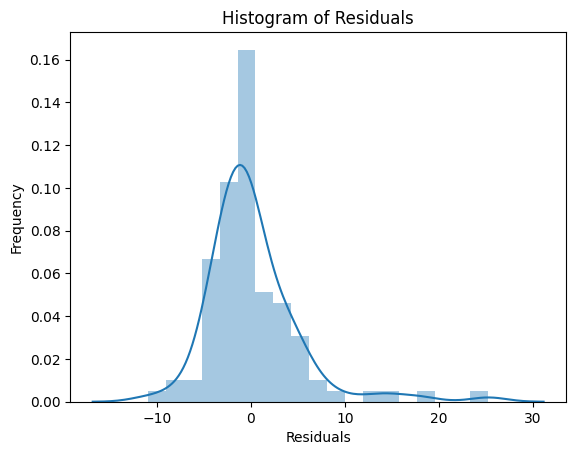

In [22]:
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [50]:
# Model Evaluation
from sklearn import metrics

r2_lin = metrics.r2_score(y_test, y_pred)

print('R2:',r2_lin)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.6687594935356322
Adjusted R^2: 0.6198262368988505
MAE: 3.189091965887846
MSE: 24.291119474973502
RMSE: 4.928602182665335


In [24]:
#new date prediction
new_data1 = [[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98]]
pred = lr.predict(scaler.transform(new_data1))
print("Predicted House Price:", pred)

Predicted House Price: [29.95339638]


c:\Users\rajan\Desktop\Boston-House-Pricing\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
import pickle
pickle.dump(lr,open('lr.pkl','wb'))

In [26]:
pickle.dump(scaler,open('scaler.pkl','wb'))

Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred_random = RandomForest.predict(X_test)

In [51]:
r2_randon = metrics.r2_score(y_test, y_pred_random)

print('R2:',r2_randon)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_random))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_random))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_random))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

R2: 0.8774663637876395
Adjusted R^2: 0.8593648038926317
MAE: 2.1050882352941174
MSE: 8.985855107843136
RMSE: 2.997641590958321


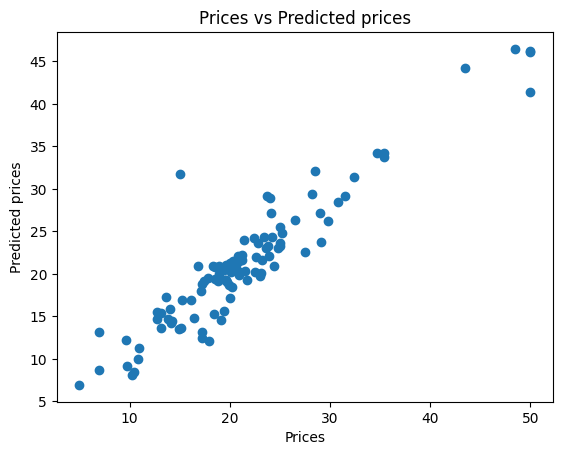

In [30]:
plt.scatter(y_test, y_pred_random)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

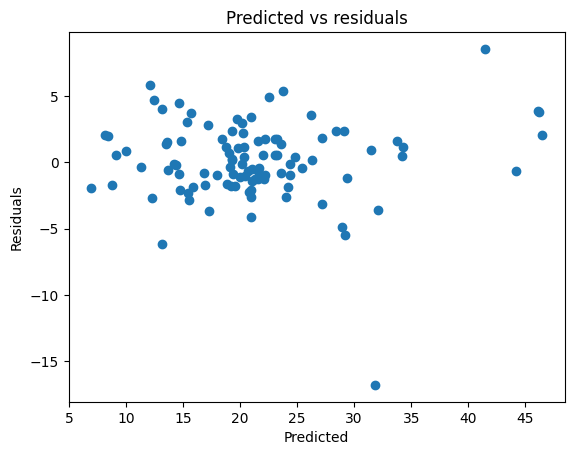

In [33]:
plt.scatter(y_pred_random,y_test-y_pred_random)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

XGBoost Regressor

In [40]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [52]:
y_pred_XGB = xgb.predict(X_test)

r2_xgb = metrics.r2_score(y_test, y_pred_XGB)

print('R^2:',r2_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_XGB))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_XGB))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_XGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_XGB)))

R^2: 0.9081463423471537
Adjusted R^2: 0.8945770520120742
MAE: 1.9662464057697968
MSE: 6.735976212796364
RMSE: 2.5953759289930165


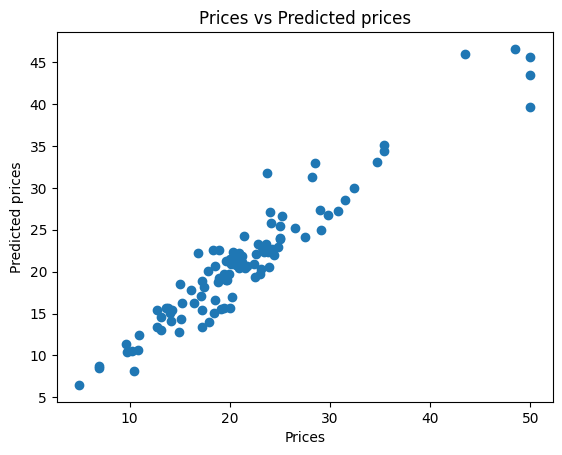

In [38]:
plt.scatter(y_test, y_pred_XGB)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

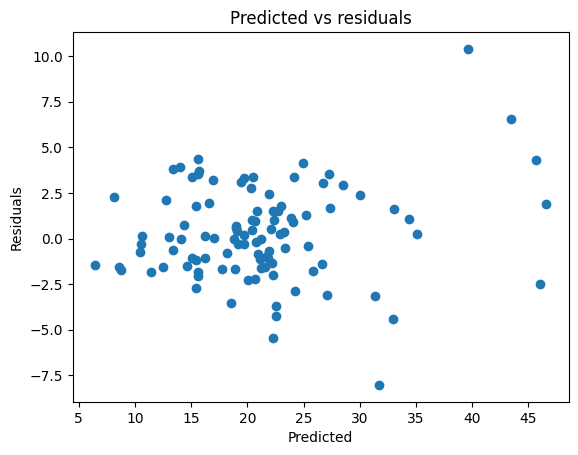

In [39]:
plt.scatter(y_pred_XGB,y_test-y_pred_XGB)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

SVM Regressor

In [ ]:
from sklearn.svm import SVR

# Create a SVM Regressor
svr_reg = SVR()
svr_reg.fit(X_train,y_train)

SVR()

In [48]:
y_pred_svr = svr_reg.predict(X_test)

r2_svm = metrics.r2_score(y_test, y_pred_svr)

print('R2:',r2_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_svr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_svr))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_svr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

R2: 0.6499766059760035
Adjusted R^2: 0.598268604586095
MAE: 2.7317161761558397
MSE: 25.668539678396044
RMSE: 5.0664129005042655


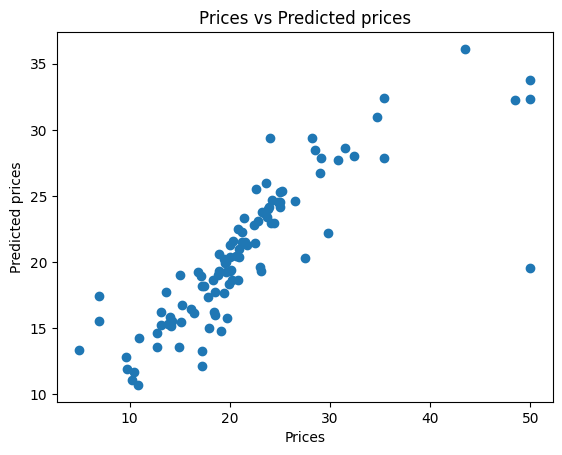

In [44]:
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

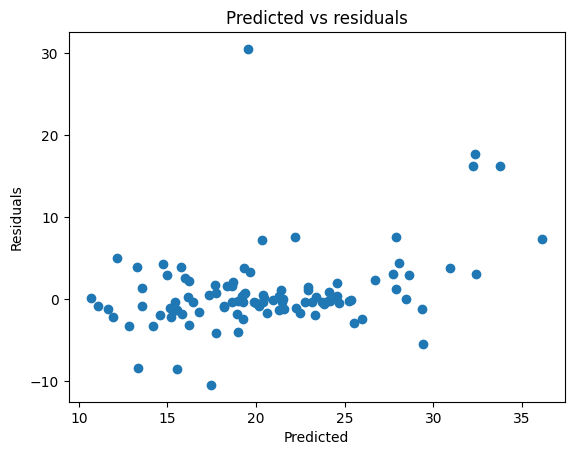

In [45]:
# Checking residuals
plt.scatter(y_pred_svr,y_test-y_pred_svr)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [53]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [r2_lin*100, r2_randon*100, r2_xgb*100, r2_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,90.814634
1,Random Forest,87.746636
0,Linear Regression,66.875949
3,Support Vector Machines,64.997661
